In [8]:

!pip install eli5

     |████████████████████████████████| 112kB 2.9MB/s 


In [2]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_cars"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_cars


In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

In [13]:
!pwd

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_cars


Wczytywanie danych

In [14]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [15]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

Dummy Model

In [16]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [18]:
feats = ['car_id']
x = df[feats].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(x,y)
y_pred = model.predict(x)

mae(y, y_pred)

39465.934630440985

In [19]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [22]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [23]:
df = df [ df ['price_currency'] != 'EUR']
df.shape

(106290, 155)

Features

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0], list): continue
  
  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFFIX_CAT] = factorized_values
 

In [36]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x ]
cat_feats = [x for x in cat_feats if 'pirce' not in x]
len(cat_feats)

154

In [37]:
x = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, x, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19351.860214198372

In [40]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(x, y)

imp = PermutationImportance(m, random_state=0).fit(x, y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2543 ± 0.0047,param_napęd__cat
0.1837 ± 0.0075,param_faktura-vat__cat
0.1637 ± 0.0040,param_stan__cat
0.1313 ± 0.0069,price_value__cat
0.0504 ± 0.0019,feature_kamera-cofania__cat
0.0478 ± 0.0048,param_moc__cat
0.0328 ± 0.0018,param_rok-produkcji__cat
0.0323 ± 0.0016,param_skrzynia-biegów__cat
0.0249 ± 0.0027,param_marka-pojazdu__cat
0.0199 ± 0.0015,param_pojemność-skokowa__cat


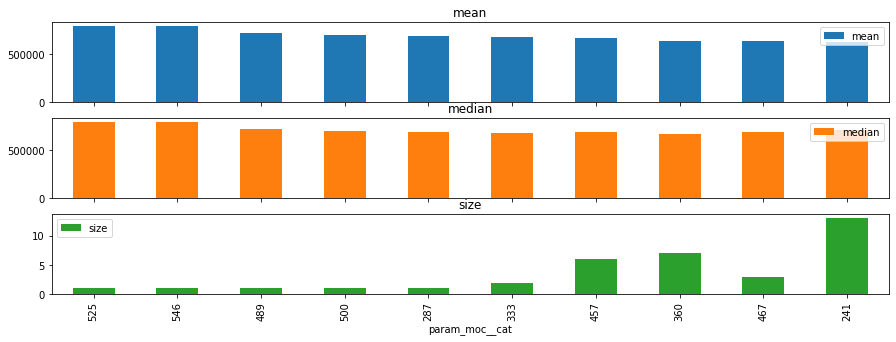

In [41]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=10, subplots=True):
  return(
    df
   .groupby(feat_groupby)[feat_agg]
   .agg(agg_funcs)
   .sort_values(by=feat_sort,ascending=False)
   .head(top)
   
).plot(kind='bar', figsize=(15,5), subplots=subplots)

group_and_barplot ('param_moc__cat');
